# 6-4 SVD - 특이값 분해

<img src=https://blog.kakaocdn.net/dn/bjQrbW/btrEPaWBbAG/lIl9rS7PZy7w8NajW6MjkK/img.png width=1000><br>
대표적인 행렬 분해 방법: 고유값 분해와 특이값 분해<br>

## 특이값 분해
<img src=https://blog.kakaocdn.net/dn/bfTUDU/btrELkM5wvs/e4f32ERqybWmj2VmX8oXZ0/img.png width=1000><br>

## SVD 유형
<img src=https://blog.kakaocdn.net/dn/dnELoH/btrELVz9uD8/SYyForQdGApqxD6Z0CrV01/img.png width=1000><br>
- **일반적인 SVD는 Truncated SVD를 지칭한다.**

## SVD 행렬 분해 의미
<img src=https://blog.kakaocdn.net/dn/drzoud/btrEOHtCrJd/dJfCjKqpsy64y26dTNIWNk/img.png width=1000><br>
- SVD 행렬 분해를 통해 m x r의 Latent Factor(잠재 요인)을 찾을 수 있고, 이로부터 많은 분야에 활용을 할 수 있다.
- Latent Factor : 함축되는 잠재 요인
 -> 예를들어 영화 종류별 만족도가 있을 때, SVD에서 Latent Factor는 영화의 카테고리가 될 수 있다.
- **그래서 Latent Factor를 찾는데 행렬 분해가 사용이 된다.**<br>
<img src=https://blog.kakaocdn.net/dn/bjXxYu/btrEPOTjAjW/gv7HSZVEI5aoHH2gKMXyP0/img.png width=1000>

# SVD 개요
##  Compact SVD

In [12]:
# numpy의 svd 모듈 import
import numpy as np
from numpy.linalg import svd

# 4X4 Random 행렬 a 생성 
np.random.seed(121)
a = np.random.randn(4,4)
print(np.round(a, 3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


### **SVD 행렬 분해**

In [13]:
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('\nU matrix:\n',np.round(U, 3))
print('\nSigma Value(대각 행렬) - 0 아닌 값만 표현:\n',np.round(Sigma, 3))
print('\nV transpose matrix:\n',np.round(Vt, 3))

(4, 4) (4,) (4, 4)

U matrix:
 [[-0.079 -0.318  0.867  0.376]
 [ 0.383  0.787  0.12   0.469]
 [ 0.656  0.022  0.357 -0.664]
 [ 0.645 -0.529 -0.328  0.444]]

Sigma Value(대각 행렬) - 0 아닌 값만 표현:
 [3.423 2.023 0.463 0.079]

V transpose matrix:
 [[ 0.041  0.224  0.786 -0.574]
 [-0.2    0.562  0.37   0.712]
 [-0.778  0.395 -0.333 -0.357]
 [-0.593 -0.692  0.366  0.189]]


### **분해된 행렬들을 이용하여 다시 원행렬로 원복**

In [14]:
# Sima를 다시 0 을 포함한 대칭행렬로 변환
Sigma_mat = np.diag(Sigma)
print(f"대칭행렬로 변환된 Sigma_mat:\n{Sigma_mat}")
a_ = np.dot(np.dot(U, Sigma_mat), Vt)
print(f"\n원복된 원행렬:\n{np.round(a_, 3)}")

대칭행렬로 변환된 Sigma_mat:
[[3.4229581  0.         0.         0.        ]
 [0.         2.02287339 0.         0.        ]
 [0.         0.         0.46263157 0.        ]
 [0.         0.         0.         0.07935069]]

원복된 원행렬:
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.014  0.63   1.71  -1.327]
 [ 0.402 -0.191  1.404 -1.969]]


In [15]:
Sigma_mat

array([[3.4229581 , 0.        , 0.        , 0.        ],
       [0.        , 2.02287339, 0.        , 0.        ],
       [0.        , 0.        , 0.46263157, 0.        ],
       [0.        , 0.        , 0.        , 0.07935069]])

### **데이터 의존도가 높은 원본 데이터 행렬 생성**

In [16]:
a[2] = a[0] + a[1] # 3행 - 이 첫행과 2행의 합
a[3] = a[0] # 4행 - 첫행과 동일

print(np.round(a,3))

[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


In [17]:
# 다시 SVD를 수행하여 Sigma 값 확인 
U, Sigma, Vt = svd(a)
print(U.shape, Sigma.shape, Vt.shape)
print('\nSigma Value:\n',np.round(Sigma,3))
# 시그마 값이 전에 비해 감소 (의존도가 높아서)

(4, 4) (4,) (4, 4)

Sigma Value:
 [2.663 0.807 0.    0.   ]


### 원행렬 원복

In [11]:
# U 행렬의 경우는 Sigma와 내적을 수행하므로 Sigma의 앞 2행에 대응되는 앞 2열만 추출
U_ = U[:, :2]
Sigma_ = np.diag(Sigma[:2])
# V 전치 행렬의 경우는 앞 2행만 추출
Vt_ = Vt[:2]
print(U_.shape, Sigma_.shape, Vt_.shape)
# U, Sigma, Vt의 내적을 수행하며, 다시 원본 행렬 복원
a_ = np.dot(np.dot(U_,Sigma_), Vt_)
print(f"\n원복된 원행렬:\n{np.round(a_, 3)}")

(4, 2) (2, 2) (2, 4)

원복된 원행렬:
[[-0.212 -0.285 -0.574 -0.44 ]
 [-0.33   1.184  1.615  0.367]
 [-0.542  0.899  1.041 -0.073]
 [-0.212 -0.285 -0.574 -0.44 ]]


## Truncated SVD

### Truncated SVD 를 이용한 행렬 분해
- Truncated SVD를 이용하면, 복원했을 때 원본행렬이 그래도 나오지 않는다.
- num_components가 커질 수록 원본행렬에 가깝게 복원된다.

In [37]:
import numpy as np
from scipy.sparse.linalg import svds
from scipy.linalg import svd

# 원본 행렬을 출력하고, SVD를 적용할 경우 U, Sigma, Vt 의 차원 확인 
np.random.seed(121)
matrix = np.random.random((6, 6))
print('원본 행렬:\n',matrix)
U, Sigma, Vt = svd(matrix, full_matrices=False)
print('\n분해 행렬 차원:',U.shape, Sigma.shape, Vt.shape)
print('\nSigma값 행렬:', Sigma)

# Truncated SVD로 Sigma 행렬의 특이값을 4개로 하여 Truncated SVD 수행. 
num_components = 5 # num_components가 커지면 더 원본에 가깝게 복원이 된다. 왜 6하면 에러나지?
U_tr, Sigma_tr, Vt_tr = svds(matrix, k=num_components)
print('\nTruncated SVD 분해 행렬 차원:',U_tr.shape, Sigma_tr.shape, Vt_tr.shape)
print('\nTruncated SVD Sigma값 행렬:', Sigma_tr)
matrix_tr = np.dot(np.dot(U_tr,np.diag(Sigma_tr)), Vt_tr)  # output of TruncatedSVD

print('\nTruncated SVD로 분해 후 복원 행렬:\n', matrix_tr)

원본 행렬:
 [[0.11133083 0.21076757 0.23296249 0.15194456 0.83017814 0.40791941]
 [0.5557906  0.74552394 0.24849976 0.9686594  0.95268418 0.48984885]
 [0.01829731 0.85760612 0.40493829 0.62247394 0.29537149 0.92958852]
 [0.4056155  0.56730065 0.24575605 0.22573721 0.03827786 0.58098021]
 [0.82925331 0.77326256 0.94693849 0.73632338 0.67328275 0.74517176]
 [0.51161442 0.46920965 0.6439515  0.82081228 0.14548493 0.01806415]]

분해 행렬 차원: (6, 6) (6,) (6, 6)

Sigma값 행렬: [3.2535007  0.88116505 0.83865238 0.55463089 0.35834824 0.0349925 ]

Truncated SVD 분해 행렬 차원: (6, 5) (5,) (5, 6)

Truncated SVD Sigma값 행렬: [0.35834824 0.55463089 0.83865238 0.88116505 3.2535007 ]

Truncated SVD로 분해 후 복원 행렬:
 [[0.11368271 0.19721195 0.23106956 0.15961551 0.82758207 0.41695496]
 [0.55500167 0.75007112 0.24913473 0.96608621 0.95355502 0.48681791]
 [0.01789183 0.85994318 0.40526464 0.62115143 0.29581906 0.92803075]
 [0.40782587 0.55456069 0.24397702 0.23294659 0.035838   0.58947208]
 [0.82711496 0.78558742 0.94865955 

In [33]:
min(matrix.shape)

6

### 사이킷런 TruncatedSVD 클래스를 이용한 변환
- 사이킷런에선 svd를 이용해 고윳값 분해를 한다.<br>
 **즉, svd를 이용해서 pca를 구현한다.**

Text(0, 0.5, 'TruncatedSVD Component 2')

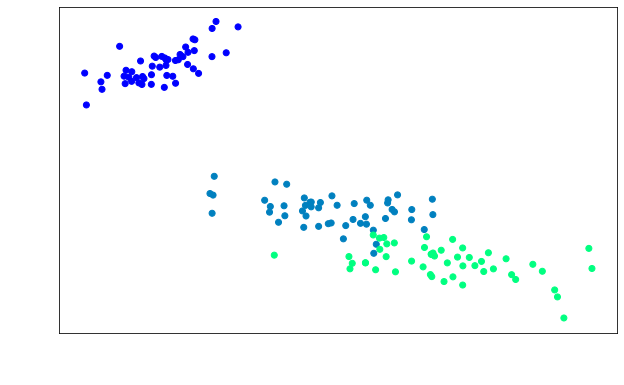

In [42]:
from sklearn.decomposition import TruncatedSVD, PCA
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['xtick.color'] = 'white';plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.color'] = 'white';plt.rcParams['ytick.labelsize']=15
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['axes.labelsize']= 20
plt.rcParams['figure.figsize'] = (10,6)

iris = load_iris()
iris_ftrs = iris.data
# 2개의 주요 component로 TruncatedSVD 변환
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_ftrs)
iris_tsvd = tsvd.transform(iris_ftrs)

# Scatter plot 2차원으로 TruncatedSVD 변환 된 데이터 표현. 품종은 색깔로 구분
plt.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target, cmap='winter')
plt.xlabel('TruncatedSVD Component 1')
plt.ylabel('TruncatedSVD Component 2')

### TruncatedSVD와 PCA 비교 - 거의 일치
n_components를 동일하게 줬을 때, TruncatedSVD와 PCA가 거의 일치한다.

Text(0.5, 1.0, 'PCA Transformed')

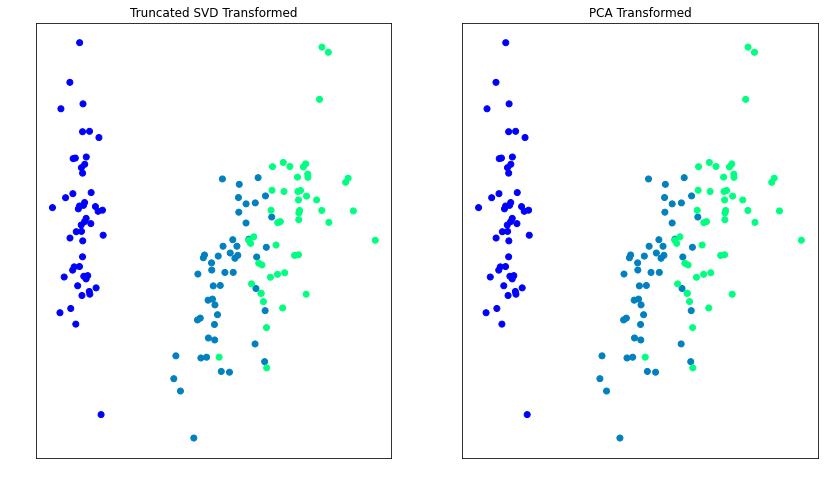

In [45]:
from sklearn.preprocessing import StandardScaler

# iris 데이터를 StandardScaler로 변환
scaler = StandardScaler()
iris_scaled = scaler.fit_transform(iris_ftrs)

# 스케일링된 데이터를 기반으로 TruncatedSVD 변환 수행 
tsvd = TruncatedSVD(n_components=2)
tsvd.fit(iris_scaled)
iris_tsvd = tsvd.transform(iris_scaled)

# 스케일링된 데이터를 기반으로 PCA 변환 수행 
pca = PCA(n_components=2)
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# TruncatedSVD 변환 데이터를 왼쪽에, PCA변환 데이터를 오른쪽에 표현 
fig, (ax1, ax2) = plt.subplots(figsize=(14,8), ncols=2)
ax1.scatter(x=iris_tsvd[:,0], y= iris_tsvd[:,1], c= iris.target, cmap='winter')
ax2.scatter(x=iris_pca[:,0], y= iris_pca[:,1], c= iris.target, cmap='winter')
ax1.set_title('Truncated SVD Transformed')
ax2.set_title('PCA Transformed')

## 6-4 NMF

### NMF
<img src=https://blog.kakaocdn.net/dn/bb1e3q/btrEO51VQT0/KPefdOOUGcVaAmJJjCgMVK/img.png width=1000>

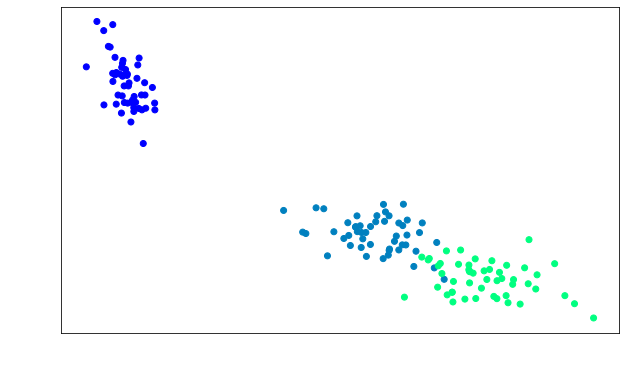

In [48]:
from sklearn.decomposition import NMF
from sklearn.datasets import load_iris
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize']=(10,6)

iris = load_iris()
iris_ftrs = iris.data
nmf = NMF(n_components=2)

nmf.fit(iris_ftrs)
iris_nmf = nmf.transform(iris_ftrs)

plt.scatter(x=iris_nmf[:,0], y= iris_nmf[:,1], c= iris.target, cmap='winter')
plt.xlabel('NMF Component 1')
plt.ylabel('NMF Component 2')
plt.show()

### NMF 행렬 분해의 의미

<img src=https://blog.kakaocdn.net/dn/dhLpmn/btrENnJhVeH/f4kJk9s9UWhBZnNVC6gzz0/img.png width=1000><br>
행렬 분해하게 되면 W의 행은 유지가 되고, 열이 줄어든다. H 행렬은 행이 줄어들고, 열이 유지된다.
이렇게 분해된 행렬은 LF(Latent Factor;잠재요소)를 특성으로 가지게되고, 많은 어플리케이션이 이 잠재요소를 기반으로 구현된다.

- 분해 행렬 W는 원본 행렬에 대해서 잠재요소의 값이 얼마나 되는지를 나타낸 것이다.
- 분해 행렬 H는 잠재요소가 원본 열(즉, 원본 속성)로 어떻게 구성됐는지를 나타내는 행렬